In [1]:
import re
import pandas as pd
import PyPDF2
import os
from openpyxl import load_workbook, Workbook
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getData():
    lineData = {'Date': [],
                'Transaction': [],
                'Amount': []}
    for x in os.listdir():
        if x.endswith('.pdf'):
            path = os.getcwd() + '\\' + x
            file = open(path, 'rb')
            readFile = PyPDF2.PdfFileReader(file)


            totalPages = readFile.numPages

            for i in range(totalPages):

                pageObj = readFile.getPage(i)
                pageText = pageObj.extractText

                newTrans = re.compile(r'[A-Z][a-z]{2} \d{2}\s')
                moneyRe = re.compile(r'\d{1,}\.\d{2}')

                for line in pageText(pageObj).split('\n'):
                    line = re.sub(r',','',line)
                    line = re.sub(r'\$\s','',line)
                    if newTrans.match(line):

                        newValue = re.split(newTrans, line)
                        newValue = ' '.join(newValue)
                        newValue = re.split(moneyRe, newValue)
                        newValue = ' '.join(newValue)

                        newKey = newTrans.findall(line)
                        newKey = ' '.join(newKey)

                        newAmount = moneyRe.findall(line)
                        newAmount = ' '.join(newAmount)
                        

                        lineData['Date']+=[newKey]
                        lineData['Transaction']+=[newValue]
                        lineData['Amount']+=[newAmount]
        dataFrame = pd.DataFrame(lineData)
    return dataFrame

In [3]:
def categorize():
    path = os.getcwd() + '\\' + 'Bank Data.xlsx'
    
    dataFrame = pd.DataFrame(getData())
    
    try:
        with pd.ExcelWriter('Bank Data.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
            dataFrame.to_excel(writer, sheet_name='Main')
    except:
        dataFrame.to_excel('Bank Data.xlsx', sheet_name='Main')

    category = input('What Keyword Would You Like to categorize? ')
    newCategory = dataFrame.query('Transaction.str.contains(@category)', engine='python')
    
    category = category.lower()
    newCategory = newCategory.append(dataFrame.query('Transaction.str.contains(@category)', engine='python'))
    
    category = category.upper()
    newCategory = newCategory.append(dataFrame.query('Transaction.str.contains(@category)', engine='python'))
    
    category = category.capitalize()
    newCategory = newCategory.append(dataFrame.query('Transaction.str.contains(@category)', engine='python'))
    display(newCategory)
    
    userIn = input(f'Would you like to categorize these transactions? (Y/N) ')
    userIn = userIn.lower()
    if userIn == "yes" or userIn == "y" or userIn == "yy" :
        userIn = input(f'Enter name of category: ')
        isIncome = input(f'Is this Category Income? (y/n) ')
        isIncome = isIncome.lower
        userIn=str(userIn)
        isIncome=str(isIncome)
        if isIncome == 'y' or 'yy' or 'yes':
            try:
                with pd.ExcelWriter('Bank Data Money In.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
                    newCategory.to_excel(writer, sheet_name=userIn)
                print('Done')
            except: 
                newCategory.to_excel('Bank Data Money In.xlsx', sheet_name=userIn)
                print('Done')
        else:
            try:
                with pd.ExcelWriter('Bank Data Money Out.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
                    newCategory.to_excel(writer, sheet_name=userIn)
                print('Done')
            except: 
                newCategory.to_excel('Bank Data Money Out.xlsx', sheet_name=userIn)
                print('Done')
    else:
        return

categorize()

What Keyword Would You Like to categorize? Deposit


,Date,Transaction,Amount
0,Feb 01 Feb 01,ACH Deposit From Square Inc,21.00
1,Feb 01 Feb 01,ACH Deposit From Square Inc,10.00
2,Feb 11 Feb 11,ACH Deposit From SCHOLASTIC BOOK,832.50
3,Feb 23 Feb 23,ACH Deposit From Square Inc,21.05
4,Feb 23 Feb 23,ACH Deposit From Square Inc,40.00
5,Feb 24 Feb 24,ACH Deposit From Square Inc,15.00
6,Feb 25 Feb 25,ACH Deposit From SCHOLASTIC BOOK,698.99
87,Mar 14 Mar 14,ACH Deposit From VENMO,138.86
88,Mar 30 Mar 30,ACH Deposit From MSPBNA,100.00
117,Apr 05 Apr 05,Check Deposit,100.00


Would you like to categorize these transactions? (Y/N) y
Enter name of category: Money in
Is this Category Income? (y/n) y
Done


In [4]:
def loadCategories():
    sheets_dict = pd.read_excel('Bank Data Money In.xlsx', sheet_name=None)
    all_sheets = []
    
    for name, sheet in sheets_dict.items():
        sheet['sheet'] = name
        sheet = sheet.rename(columns=lambda x: x.split('\n')[-1])
        all_sheets.append(sheet)
    
    full_table = pd.concat(all_sheets)
    full_table.reset_index(inplace=True, drop=True)
    
    return full_table
dataFrame = pd.DataFrame(loadCategories())


sheet
Money In     10508.42
Money in1    10508.42
Name: Amount, dtype: float64


<AxesSubplot:ylabel='sheet'>

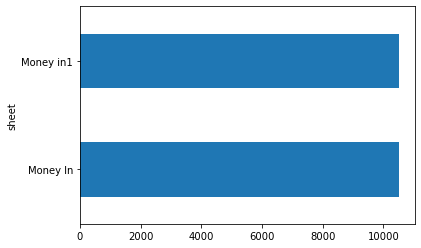

In [5]:
yAx = dataFrame.groupby('sheet')['Amount'].sum()
print(yAx)

#yAx.plot(kind='bar')
yAx.plot(kind='barh', stacked = True)

#def plotting():
    